In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
LGR_df = pd.read_csv("../../data/LGR_transcriptome/results_ave_mae_1.csv", index_col=0)
LGR_df.sort_values(by="ave_MAE").head(20)

,Gene,ave_MAE
230,LOC106566372,0.964860
308,hba,0.964900
396,LOC106607380,0.965438
442,duox,0.969507
86,LOC106583594,0.974423
358,LOC106601072,0.975660
239,pgfrl,0.975746
231,LOC106601071,0.976590
172,LOC106578021,0.979492
292,LOC123724067,0.979877


In [7]:
GFGWA_df = pd.read_csv("../../data/GFGWA_genes_minpval.csv", index_col=0)
# GFGWA_df["minpval"] = GFGWA_df[['pval_AltGreater', 'pval_AltLess']].min(axis=1)
GFGWA_df

,minpval
143b2,0.048587
2a5e,0.000469
4f2,0.012341
5nt1a,0.060738
5ntc,0.009990
...,...
zpr1,0.000167
zranb2,0.000016
zswim7,0.000152
zswim8,0.011779


In [8]:
# Add percentiles
LGR_df["LGR_pct"] = LGR_df["ave_MAE"].rank(pct=True)
LGR_df.sort_values(by="LGR_pct", ascending=True, inplace=True)
LGR_df

,Gene,ave_MAE,LGR_pct
230,LOC106566372,0.964860,0.002088
308,hba,0.964900,0.004175
396,LOC106607380,0.965438,0.006263
442,duox,0.969507,0.008351
86,LOC106583594,0.974423,0.010438
...,...,...,...
412,LOC106569466,1.028349,0.991649
197,LOC106590792,1.029229,0.993737
89,LOC106610272,1.029579,0.995825
423,LOC106571490,1.030534,0.997912


In [9]:
# GFGWA_df["GFGWA_pct"] = GFGWA_df["log_mws_score"].rank(pct=True)
# GFGWA_df.sort_values(by="GFGWA_pct", ascending=False, inplace=True)
# GFGWA_df

In [10]:
combined_df = pd.merge(left=GFGWA_df, left_on=GFGWA_df.index, right=LGR_df, right_on=LGR_df["Gene"])
combined_df

,key_0,minpval,Gene,ave_MAE,LGR_pct
0,LOC100136378,2.045360e-03,LOC100136378,1.016377,0.555324
1,LOC100136415,1.880512e-05,LOC100136415,1.005957,0.227557
2,LOC100136435,6.673468e-04,LOC100136435,1.021895,0.841336
3,LOC100136455,2.126384e-05,LOC100136455,1.006289,0.240084
4,LOC100194634,2.410694e-03,LOC100194634,1.016296,0.549061
...,...,...,...,...,...
250,trappc5,3.282887e-01,trappc5,1.011827,0.379958
251,txnrd2.2,5.015886e-04,txnrd2.2,1.013162,0.434238
252,ub2e3,7.498264e-03,ub2e3,1.013842,0.446764
253,zanl,1.974281e-09,zanl,1.021289,0.805846


In [11]:
len(combined_df["Gene"].unique())

255

In [12]:
combined_df["logminpval"] = -np.log10(combined_df["minpval"] )
combined_df

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
0,LOC100136378,2.045360e-03,LOC100136378,1.016377,0.555324,2.689230
1,LOC100136415,1.880512e-05,LOC100136415,1.005957,0.227557,4.725724
2,LOC100136435,6.673468e-04,LOC100136435,1.021895,0.841336,3.175648
3,LOC100136455,2.126384e-05,LOC100136455,1.006289,0.240084,4.672358
4,LOC100194634,2.410694e-03,LOC100194634,1.016296,0.549061,2.617858
...,...,...,...,...,...,...
250,trappc5,3.282887e-01,trappc5,1.011827,0.379958,0.483744
251,txnrd2.2,5.015886e-04,txnrd2.2,1.013162,0.434238,3.299652
252,ub2e3,7.498264e-03,ub2e3,1.013842,0.446764,2.125039
253,zanl,1.974281e-09,zanl,1.021289,0.805846,8.704591


In [13]:
pvalthreshold = -np.log10(0.05 )
pvalthreshold

1.3010299956639813

In [19]:
priority = combined_df[combined_df["LGR_pct"] < 0.1]
priority = priority[priority["minpval"] < 0.025]
priority.sort_values(by="minpval")

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
167,LOC106609359,1.240690e-09,LOC106609359,0.992081,0.054280,8.906337
233,si:ch211-106h4.4,1.672437e-08,si:ch211-106h4.4,0.992546,0.062630,7.776650
151,LOC106602771,1.238417e-06,LOC106602771,0.983748,0.027140,5.907133
123,LOC106588296,4.814967e-06,LOC106588296,0.995543,0.087683,5.317407
70,LOC106575107,5.766602e-06,LOC106575107,0.993168,0.068894,5.239080
207,gfpt1,1.104113e-04,gfpt1,0.992806,0.064718,3.956987
144,LOC106601078,1.339956e-04,LOC106601078,0.995532,0.085595,3.872909
100,LOC106583220,1.574322e-04,LOC106583220,0.989100,0.037578,3.802906
225,pim1,2.099960e-04,pim1,0.992147,0.056367,3.677789
188,LOC106613965,2.525467e-04,LOC106613965,0.995123,0.081420,3.597658


In [15]:
priority_list = list(priority["key_0"].unique())
priority_list

['LOC101448011',
 'LOC106575107',
 'LOC106583220',
 'LOC106588296',
 'LOC106601072',
 'LOC106601078',
 'LOC106602771',
 'LOC106603702',
 'LOC106609359',
 'LOC106613694',
 'LOC106613965',
 'gfpt1',
 'otub1',
 'pim1',
 'si:ch211-106h4.4']

In [16]:
combined_df_without_priority = combined_df[~combined_df["key_0"].isin(priority_list)]
combined_df_without_priority

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
0,LOC100136378,2.045360e-03,LOC100136378,1.016377,0.555324,2.689230
1,LOC100136415,1.880512e-05,LOC100136415,1.005957,0.227557,4.725724
2,LOC100136435,6.673468e-04,LOC100136435,1.021895,0.841336,3.175648
3,LOC100136455,2.126384e-05,LOC100136455,1.006289,0.240084,4.672358
4,LOC100194634,2.410694e-03,LOC100194634,1.016296,0.549061,2.617858
...,...,...,...,...,...,...
250,trappc5,3.282887e-01,trappc5,1.011827,0.379958,0.483744
251,txnrd2.2,5.015886e-04,txnrd2.2,1.013162,0.434238,3.299652
252,ub2e3,7.498264e-03,ub2e3,1.013842,0.446764,2.125039
253,zanl,1.974281e-09,zanl,1.021289,0.805846,8.704591


In [17]:
combined_priority_only = combined_df[combined_df["key_0"].isin(priority_list)]
combined_priority_only

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
14,LOC101448011,2.589703e-04,LOC101448011,0.996414,0.093946,3.586750
70,LOC106575107,5.766602e-06,LOC106575107,0.993168,0.068894,5.239080
100,LOC106583220,1.574322e-04,LOC106583220,0.989100,0.037578,3.802906
123,LOC106588296,4.814967e-06,LOC106588296,0.995543,0.087683,5.317407
143,LOC106601072,3.100406e-02,LOC106601072,0.975660,0.012526,1.508581
144,LOC106601078,1.339956e-04,LOC106601078,0.995532,0.085595,3.872909
151,LOC106602771,1.238417e-06,LOC106602771,0.983748,0.027140,5.907133
154,LOC106603702,3.282106e-02,LOC106603702,0.985027,0.031315,1.483847
167,LOC106609359,1.240690e-09,LOC106609359,0.992081,0.054280,8.906337
186,LOC106613694,3.089167e-03,LOC106613694,0.991863,0.048017,2.510159


In [ ]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

In [ ]:
combined_priority_only.iloc[0]["Gene"]

'LOC106583220'

In [ ]:
combined_priority_only

,key_0,minpval,Gene,ave_MAE,LGR_pct,logminpval
100,LOC106583220,0.000157,LOC106583220,0.989100,0.037578,3.802906
143,LOC106601072,0.031004,LOC106601072,0.975660,0.012526,1.508581
151,LOC106602771,0.000001,LOC106602771,0.983748,0.027140,5.907133
154,LOC106603702,0.032821,LOC106603702,0.985027,0.031315,1.483847
186,LOC106613694,0.003089,LOC106613694,0.991863,0.048017,2.510159
223,otub1,0.001217,otub1,0.983916,0.029228,2.914580


/tmp/ipykernel_4489/1687428687.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = combined_priority_only["logminpval"],


Text(0, 0.5, 'LGR percentile')

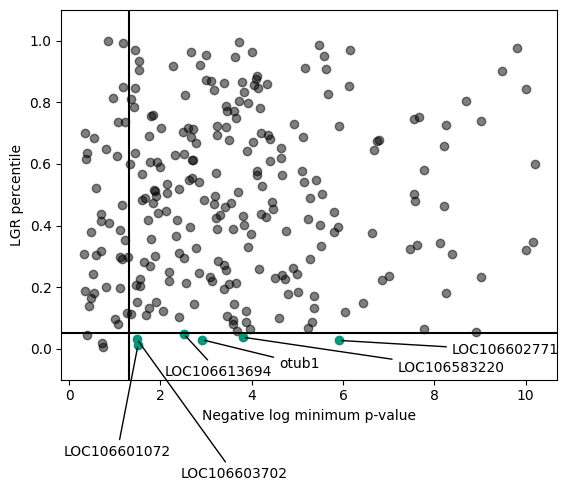

In [ ]:
plt.scatter(x = combined_df_without_priority["logminpval"], 
            y = combined_df_without_priority["LGR_pct"],
            c='k',
            alpha=0.5)
plt.scatter(x = combined_priority_only["logminpval"], 
            y = combined_priority_only["LGR_pct"],
            c=light_green,
            alpha=1)
plt.axvline(x=pvalthreshold, c='k')
plt.axhline(y=0.05, c='k')
plt.ylim(-.1, 1.1)
plt.annotate(combined_priority_only.iloc[0]["Gene"], 
             (combined_priority_only.iloc[0]["logminpval"], 
              combined_priority_only.iloc[0]["LGR_pct"]), 
              textcoords="offset points", xytext=(150,-25), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[1]["Gene"], 
             (combined_priority_only.iloc[1]["logminpval"], 
              combined_priority_only.iloc[1]["LGR_pct"]), 
              textcoords="offset points", xytext=(-15,-80), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[2]["Gene"], 
             (combined_priority_only.iloc[2]["logminpval"], 
              combined_priority_only.iloc[2]["LGR_pct"]), 
              textcoords="offset points", xytext=(120,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[3]["Gene"], 
             (combined_priority_only.iloc[3]["logminpval"], 
              combined_priority_only.iloc[3]["LGR_pct"]), 
              textcoords="offset points", xytext=(70,-100), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[4]["Gene"], 
             (combined_priority_only.iloc[4]["logminpval"], 
              combined_priority_only.iloc[4]["LGR_pct"]), 
              textcoords="offset points", xytext=(25,-30), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[5]["Gene"], 
             (combined_priority_only.iloc[5]["logminpval"], 
              combined_priority_only.iloc[5]["LGR_pct"]), 
              textcoords="offset points", xytext=(70,-20), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.xlabel("Negative log minimum p-value")
plt.ylabel("LGR percentile")